In [3]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 795.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [5]:
%%writefile main.py

Writing main.py


In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bikes.mp4 to bikes.mp4
User uploaded file "bikes.mp4" with length 3139354 bytes


In [11]:
import cv2
from ultralytics import YOLO

In [12]:
# Load the model
yolo = YOLO('yolov8s.pt')

In [8]:
# Load the video capture
# videoCap = cv2.VideoCapture(0)

In [13]:
videoCap = cv2.VideoCapture('bikes.mp4') # Replace 'your_video_file_name.mp4' with the actual name of your uploaded file


0: 384x640 17 persons, 12 bicycles, 1 traffic light, 2 backpacks, 413.2ms
Speed: 3.7ms preprocess, 413.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


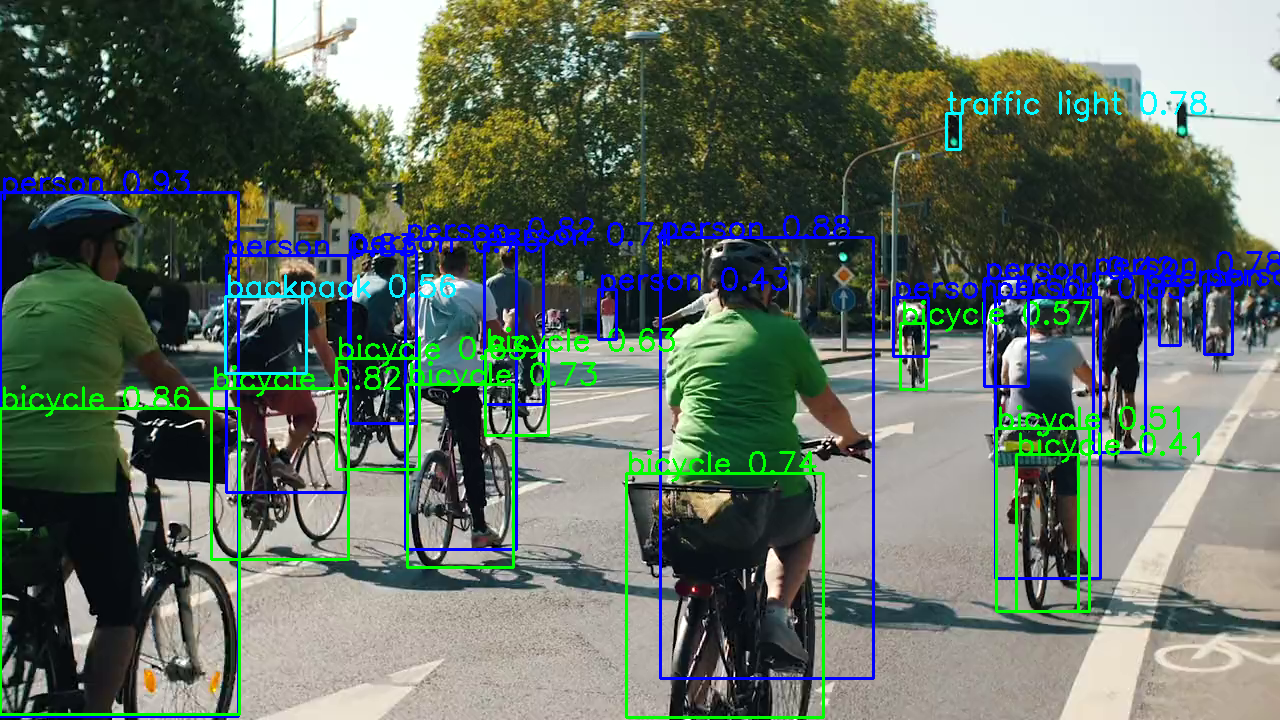

error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [15]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Function to get class colors
def getColours(cls_num):
    base_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    color_index = cls_num % len(base_colors)
    increments = [(1, -2, 1), (-2, 1, -1), (1, -1, 2)]
    color = [base_colors[color_index][i] + increments[color_index][i] *
    (cls_num // len(base_colors)) % 256 for i in range(3)]
    return tuple(color)


# Load the model
yolo = YOLO('yolov8s.pt')

# Load the video capture
videoCap = cv2.VideoCapture('bikes.mp4') # Replace 'your_video_file_name.mp4' with the actual name of your uploaded file

# Get video properties
frame_width = int(videoCap.get(3))
frame_height = int(videoCap.get(4))
fps = int(videoCap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))


while True:
    ret, frame = videoCap.read()
    if not ret:
        break # Break the loop when the video ends

    results = yolo.track(frame, stream=True)

    for result in results:
        # get the classes names
        classes_names = result.names

        # iterate over each box
        for box in result.boxes:
            # check if confidence is greater than 40 percent
            if box.conf[0] > 0.4:
                # get coordinates
                [x1, y1, x2, y2] = box.xyxy[0]
                # convert to int
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # get the class
                cls = int(box.cls[0])

                # get the class name
                class_name = classes_names[cls]

                # get the respective colour
                colour = getColours(cls)

                # draw the rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), colour, 2)

                # put the class name and confidence on the image
                cv2.putText(frame, f'{classes_names[int(box.cls[0])]} {box.conf[0]:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)

    # Write the frame to the output video file
    out.write(frame)

    # show the image using cv2_imshow
    cv2_imshow(frame)

    # break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture and destroy all windows
videoCap.release()
out.release() # Release the video writer
cv2.destroyAllWindows()

In [ ]:
# release the video capture and destroy all windows
videoCap.release()
cv2.destroyAllWindows()